<a href="https://colab.research.google.com/github/rahiakela/opencv-projects-and-guide/blob/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/1_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection

Face processing is a hot topic in artificial intelligence because a lot of information can be automatically extracted from faces using computer vision algorithms. 

The face plays an important role in visual communication because a great deal of non-verbal information, such as identity, intent, and emotion, can be extracted from human faces. 

Face processing is a really interesting topic for computer vision learners because it touches on different areas of expertise, such as object detection, image processing, and landmark detection or object tracking.

In this notebook, you will be introduced to the main topics related to face processing using state-of-the-art algorithms and techniques in order to achieve impressive results.

We will cover the following topics:

- Face processing introduction
- Face detection
- Detecting facial landmarks
- Face tracking
- Face recognition

## Setup

In [ ]:
%%shell

pip install dlib
pip install face_recognition
pip install cvlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
    return image

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/test_face_detection.jpg
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalface_alt2.xml
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalface_default.xml

In [5]:
# Load image and convert to grayscale
img = cv2.imread("test_face_detection.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Face processing introduction

In order to introduce this notebook, we will be using different approaches throughout all the sections to see the different possibilities you have at hand to solve a concrete face processing task, and it can be helpful to have a high-level overview of all of these alternatives.

<img src='https://github.com/rahiakela/img-repo/blob/master/object-detection-images/face-processing.png?raw=1' width='800'/>

As you can see, four main points are going to be tackled here:

- **Face detection** is a specific case of object detection, where the task is to find both the locations and sizes of all the faces in an image.
- **Facial landmarks detection** is a specific case of landmarks detection, where the task is to locate the main landmarks in a face.
- **Face tracking** is a specific case of object tracking, where the task is to find both the locations and sizes of all the moving faces in a video by taking into account the extra information that can be extracted in consecutive frames of the video.
- **Face recognition** is a specific case of object recognition, where a person is identified or verified from an image or video using the information extracted
from the face:
  - **Face identification (1:N)**: The task is to find the closest match from
an unknown person in a collection of known faces.
  - **Face verification (1:1)**: The task is to check whether the person is
who they claim to be.

## Face detection

Face detection, which can be defined as the task of determining the location and size of faces in digital images, is usually the first key step when building face processing applications like:-

- facial expression recognition, 
- drowsiness detection, 
- gender classification, 
- face recognition, 
- head-pose estimation, or 
- human-computer interaction

This is because the aforementioned applications requires as an input the location and size of the detected faces. Therefore, automatic face detection plays a critical role, and is one of the most studied topics in the artificial intelligence community.

Face detection seems like an effortless task for a human, but it is a very challenging task for computers because many problems/challenges are usually involved.

In this section, we will see some of the most popular face detection techniques that the OpenCV library and the dlib and face_processing packages provide.

## Face detection with OpenCV

OpenCV provides two approaches for face detection:

- Haar cascade based face detectors
- Deep learning-based face detectors

To performs face detection using haar featurebased cascade classifiers. In this sense, OpenCV provides four cascade classifiers to use for (frontal) face detection:

- `haarcascade_frontalface_alt.xml` (FA1): 22 stages and 20 x 20 haar
features
- `haarcascade_frontalface_alt2.xml` (FA2): 20 stages and 20 x 20 haar
features
- `haarcascade_frontalface_alt_tree.xml` (FAT): 47 stages and 20 x 20 haar
features
- `haarcascade_frontalface_default.xml` (FD): 25 stages and 24 x 24 haar
features

Overall, it can be concluded that these classifiers achieve similar accuracy. That is why we will be using two of them.


In [6]:
# Load cascade classifiers
cas_alt2 = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
cas_default = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

The next step is to perform the detection.

In [8]:
faces_alt2 = cas_alt2.detectMultiScale(img_gray)
faces_default = cas_default.detectMultiScale(img_gray)

In [11]:
faces_alt2

array([[332,  93, 364, 364],
       [695, 104, 256, 256]], dtype=int32)

In [12]:
faces_default

array([[321,  84, 385, 385],
       [697, 107, 248, 248],
       [ 88,  75, 316, 316],
       [894, 573,  52,  52]], dtype=int32)

The final step is to correlate the results using the show_detection() function:

In [9]:
img_faces_alt2 = show_detection(img.copy(), faces_alt2)
img_faces_default = show_detection(img.copy(), faces_default)

OpenCV also provides the cv2.face.getFacesHAAR() function to detect faces.

In [10]:
retval, faces_haar_alt2 = cv2.face.getFacesHAAR(img, "haarcascade_frontalface_alt2.xml")
retval, faces_haar_default = cv2.face.getFacesHAAR(img, "haarcascade_frontalface_alt2.xml")

It should be noted that cv2.CascadeClassifier.detectMultiScale() needs a
grayscale image, while cv2.face.getFacesHAAR() needs a BGR image as an input.
Moreover, cv2.CascadeClassifier.detectMultiScale() outputs the detected faces
as a list of rectangles.

In [15]:
faces_haar_alt2

array([[[693, 105, 258, 258]],

       [[103,  64, 298, 298]],

       [[330, 101, 358, 358]]], dtype=int32)

In [16]:
faces_haar_default

array([[[693, 105, 258, 258]],

       [[103,  64, 298, 298]],

       [[330, 101, 358, 358]]], dtype=int32)

To get rid of the useless one-dimension arrays, call np.squeeze().

In [20]:
faces_haar_alt2 = np.squeeze(faces_haar_alt2)
faces_haar_alt2

array([[693, 105, 258, 258],
       [103,  64, 298, 298],
       [330, 101, 358, 358]], dtype=int32)

In [19]:
faces_haar_default = np.squeeze(faces_haar_default)
faces_haar_default

array([[693, 105, 258, 258],
       [103,  64, 298, 298],
       [330, 101, 358, 358]], dtype=int32)

In [21]:
# Draw face detections
img_faces_alt2 = show_detection(img.copy(), faces_alt2)
img_faces_default = show_detection(img.copy(), faces_default)
img_faces_haar_alt2 = show_detection(img.copy(), faces_haar_alt2)
img_faces_haar_default = show_detection(img.copy(), faces_haar_default)

The final step is to show the four created images by using OpenCV, or Matplotlib in this case.

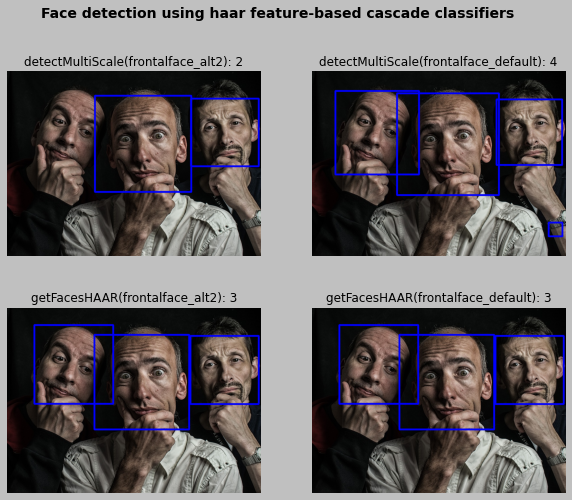

In [27]:
# Create the dimensions of the figure and set title
fig = plt.figure(figsize=(10, 8))
plt.suptitle("Face detection using haar feature-based cascade classifiers", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images
show_img_with_matplotlib(img_faces_alt2, "detectMultiScale(frontalface_alt2): " + str(len(faces_alt2)), 1)
show_img_with_matplotlib(img_faces_default, "detectMultiScale(frontalface_default): " + str(len(faces_default)), 2)
show_img_with_matplotlib(img_faces_haar_alt2, "getFacesHAAR(frontalface_alt2): " + str(len(faces_haar_alt2)), 3)
show_img_with_matplotlib(img_faces_haar_default, "getFacesHAAR(frontalface_default): " + str(len(faces_haar_default)), 4)

plt.show()

As you can see, the detected faces vary using the four aforementioned approximations by using haar feature-based cascade classifiers. Finally, it should also be commented that the `cv2.CascadeClassifier.detectMultiScale()` function has the minSize and maxSize parameters in order to establish the minimum size (objects smaller than minSize will not be detected) and the maximum size (objects larger than maxSize will not be detected), respectively. On the contrary, the `cv2.face.getFacesHAAR()` function does not offer this possibility.

**Haar feature-based cascade classifiers can be used to detect objects other than human faces. The OpenCV library also provides two cascade files to use for cat face detection.**

Indeed, the key modification is the two cascade files that have been loaded. In this case, here are the two loaded cascade files:

- `haarcascade_frontalcatface.xml`: A frontal cat face detector using the basic
set of haar features with 20 stages and 24 x 24 haar features
- `haarcascade_frontalcatface_extended.xml`: A frontal cat face detector
using the full set of haar features with 20 stages and 24 x 24 haar features

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/test_cat_face_detection.jpg
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalcatface.xml
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalcatface_extended.xml

In [31]:
# Load image and convert to grayscale
img = cv2.imread("test_cat_face_detection.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [32]:
# Load cascade classifiers
cas_catface = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")
cas_catface_extended  = cv2.CascadeClassifier("haarcascade_frontalcatface_extended.xml")

In [34]:
# Detect faces:
faces_cas_catface = cas_catface.detectMultiScale(img_gray)
faces_cas_catface_extended = cas_catface_extended.detectMultiScale(img_gray)
retval, faces_haar_cat = cv2.face.getFacesHAAR(img, "haarcascade_frontalcatface.xml")
faces_haar_cat = np.squeeze(faces_haar_cat)
retval, faces_haar_cat_extended = cv2.face.getFacesHAAR(img, "haarcascade_frontalcatface_extended.xml")
faces_haar_cat_extended = np.squeeze(faces_haar_cat_extended)

In [35]:
# Draw cat face detections:
img_cas_catface = show_detection(img.copy(), faces_cas_catface)
img_cas_catface_extended = show_detection(img.copy(), faces_cas_catface_extended)
img_faces_haar_cat = show_detection(img.copy(), faces_haar_cat)
img_faces_haar_cat_extended = show_detection(img.copy(), faces_haar_cat_extended)

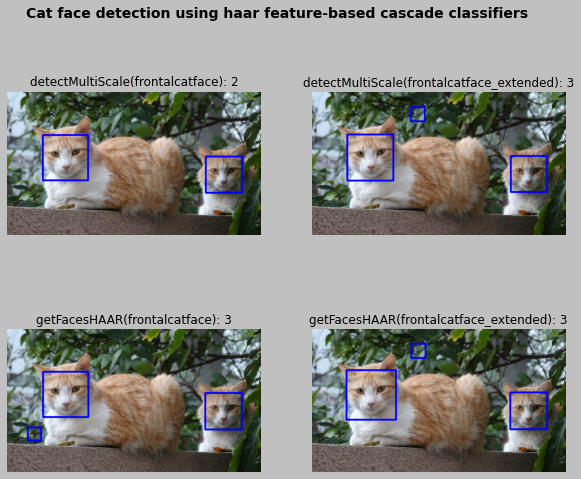

In [38]:
# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(10, 8))
plt.suptitle("Cat face detection using haar feature-based cascade classifiers", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images:
show_img_with_matplotlib(img_cas_catface, "detectMultiScale(frontalcatface): " + str(len(faces_cas_catface)), 1)
show_img_with_matplotlib(img_cas_catface_extended, "detectMultiScale(frontalcatface_extended): " + str(len(faces_cas_catface_extended)), 2)
show_img_with_matplotlib(img_faces_haar_cat, "getFacesHAAR(frontalcatface): " + str(len(faces_haar_cat)), 3)
show_img_with_matplotlib(img_faces_haar_cat_extended, "getFacesHAAR(frontalcatface_extended): " + str(len(faces_haar_cat_extended)), 4)

plt.show()

Additionally, OpenCV provides a [deep learning-based face detector](https://github.com/opencv/opencv/tree/master/samples/dnn/face_detector).

More specifically, the OpenCV deep neural network (DNN) face detector is based on the Single Shot MultiBox Detector (SSD) framework using a ResNet-10 network.

